<a href="https://www.kaggle.com/code/allisonamethyst/data-that-smells-good-perfume-analysis-pandas?scriptVersionId=273893858" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **🌸 INTRODUCTION**

Perfumes are more than just scents; they are a way of life. They represent identity, mood and even status. Today we'll be exploring a dataset from [@ayushghawana](https://www.kaggle.com/datasets/ayushghawana/perfume-dataset), on fragrances from multiple brands, their characteristics, usage, category and performance.

Our goal is to uncover trends, patterns and insights in the world of perfumes.

Today's analysis will follow the order
  * Dataset Overview
  * Data Cleaning and Preparation
  * Comprehensive EDA
  * Relationship Analysis
  * Advanced Visualisations
  * Insights and Takeaways

## **📊 DATASET LOADING**

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


In [2]:
#set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [3]:
#Loading the perfume dataset
df = pd.read_csv('/kaggle/input/perfume-dataset/Perfumes_dataset.csv')
print("Dataset loaded successfully!")


Dataset loaded successfully!


In [4]:
#Loading the first few rows
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1004, 6)


,brand,perfume,type,category,target_audience,longevity
0,dumont,nitro red,edp,Fresh Scent,Male,Strong
1,dumont,nitro pour homme,edp,Fresh Scent,Male,Strong
2,dumont,nitro white,edp,Fresh Scent,Unisex,Strong
3,dumont,nitro blue,edp,Fresh Scent,Unisex,Strong
4,dumont,nitro green,edp,Fresh Scent,Unisex,Strong


## ✨ **DATASET OVERVIEW**

In [5]:
#Running an overview of the dataset
print("Dataset Overview")
print("=" * 50)

#A display of basic info
print('\n Column names and types')
print(df.dtypes)

print("\n Dataset Info: ")
print(f"total records:{len(df)}")
print(f"total columns:{len(df.columns)}")

#Viewing column names 
print ("\n Columns In The Dataset")
for i, col in enumerate(df.columns, 1):
     print(f"{i}. {col}")


Dataset Overview

 Column names and types
brand              object
perfume            object
type               object
category           object
target_audience    object
longevity          object
dtype: object

 Dataset Info: 
total records:1004
total columns:6

 Columns In The Dataset
1. brand
2. perfume
3. type
4. category
5. target_audience
6. longevity


The perfume dataset includes 1004 rows and 6 columns related to fragrance analysis: brand, perfume, type, category, target audience, and longevity. All columns are stored as object data types, indicating they contain textual information. 

The dataset is suitable for exploratory analysis, segmentation, and classification tasks. 

As there are no numerical columns, quantitative insights must be derived from encoded categorical values, offering a basis for more digging into scent trends, consumer preferences, and product positioning.

In [6]:
#Viewing column names 
print ("\n Columns In The Dataset")
for i, col in enumerate(df.columns, 1):
     print(f"{i}. {col}")



 Columns In The Dataset
1. brand
2. perfume
3. type
4. category
5. target_audience
6. longevity


## **🧹DATA CLEANING & PREPARATION**

* Check for missing values
* Handle duplicates (same perfume appearing multiple times)
* Standardize text fields 
* Convert Longevity into an ordered scale for easier analysis


* #### CHECK FOR MISSING VALUES

In [7]:
print('\n 🧹DATA CLEANING AND PREPARATION')
print("=" * 50)

#Checking for missing values
print ("\n Missing Values Per Column")
missing_values = df.isnull().sum()
print(missing_values[missing_values >0])

if missing_values.sum() == 0:
    print("✅ No missing values found!")




 🧹DATA CLEANING AND PREPARATION

 Missing Values Per Column
Series([], dtype: int64)
✅ No missing values found!


* #### CHECK FOR DUPLICATES

In [8]:
#Viewing Duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDUPLICATE ROWS: {duplicates}")

if duplicates > 0:
    print("Removing duplicates...")
    df = df.drop_duplicates()
    print(f"✅ Removed {duplicates} Duplicate Rows")


DUPLICATE ROWS: 63
Removing duplicates...
✅ Removed 63 Duplicate Rows


Here, we deduce that there were 63 duplicate rows

* #### STANDARDISING TEXT FEILDS



In [9]:
#Standardising The Text Columns
text_columns = df.select_dtypes(include=['object']).columns

print(f"\nText columns to standardize: {list(text_columns)}")

for col in text_columns:
    if col.lower() in ['brand', 'perfume', 'type', 'category', 'target_audience', 'longevity']:
        # Standardize gender/audience terms
        df[col] = df[col].str.strip().str.title()
        df[col] = df[col].replace({'Women': 'Female', 'Men': 'Male'})
    else:
        # General text cleaning
        df[col] = df[col].str.strip().str.title()

print("\n ✅ Text standardization completed")


Text columns to standardize: ['brand', 'perfume', 'type', 'category', 'target_audience', 'longevity']

 ✅ Text standardization completed


* #### LONGVEIVITY CONVERSION

In [10]:
#Converting Longeivity To Numerical Values

if 'longevity' in df.columns.str.lower():
    longevity_col = [col for col in df.columns if 'longevity' in col.lower()][0]
    print(f"\nLongevity column found: {longevity_col}")
    print("Unique longevity values:", df[longevity_col].unique())


Longevity column found: longevity
Unique longevity values: ['Strong' 'Medium' 'Medium–Strong :Contentreference[Oaicite:0]{Index=0}'
 'Medium :Contentreference[Oaicite:1]{Index=1}'
 'Strong :Contentreference[Oaicite:2]{Index=2}'
 'Light–Medium :Contentreference[Oaicite:3]{Index=3}'
 'Strong :Contentreference[Oaicite:4]{Index=4}'
 'Medium :Contentreference[Oaicite:5]{Index=5}' 'Light–Medium' 'Light'
 'Very Strong' '6–8 Hours' 'Longevity']


This part of the code is here to help find and analyse any column in the dataset that talks about "longevity," no matter how the column name is written.

In [11]:
#Viewing the Final Dataset Shape
print(f"\nFinal dataset shape after cleaning: {df.shape}")


Final dataset shape after cleaning: (941, 6)


Here we can see a significant difference in the shape of the data set, with the number of rows changing from 1004 to 941.

## **🔎EXPLORATORY DATA ANALYSIS**

In the exploratory data analysis, we will first examine the perfume brands, identifying the top brand by the number of perfumes and assessing whether certain brands lean more toward niche or designer fragrances.

Next, we’ll explore *perfume types and categories*, analysing the distribution of types such as **EDP** and **EDT**, the most common fragrance families, including floral and woody, and the cross-tabulation between type and category. 

For the target audience, we’ll study how perfumes are distributed across male, female, and unisex markets, highlight which categories dominate each audience, and compare longevity between them

Moving on to *longevity insights*, we’ll review the overall distribution of longevity, investigate which categories and brands are known for longer-lasting scents, and analyse how longevity varies by perfume type.

Finally, we’ll connect these findings in the *relationships and trends* section, exploring links between perfume type and longevity, audience and category preferences, and any surprising overlaps, such as unisex perfumes leaning toward woody or fresh profiles.


* ### **BRAND ANALYSIS**

In [12]:
print ('BRAND ANALYSIS 🔎')
print('='*50)

#perfume brand analysis
print('\n Perfume Brand Analysis')

brand_columns = [col for col in df.columns if 'brand' in col.lower()]
if brand_columns:
    brand_col = brand_columns[0]

#Finding the top brand by number of perfumes
top_brands = df[brand_col].value_counts().head(15)
print("Top 15 brands by number of perfumes:")
print(top_brands)

BRAND ANALYSIS 🔎

 Perfume Brand Analysis
Top 15 brands by number of perfumes:
brand
Paris Corner          77
Armaf                 70
Al Haramain           48
Fragrance World       42
Jean Paul Gaultier    37
Lattafa               36
Ajmal                 34
Azzaro                34
Hugo Boss             33
Giorgio Armani        30
Afnan                 30
Dior                  28
Hermès                27
Prada                 27
Maison Alhambra       25
Name: count, dtype: int64


Here, we see that the top 3 brands by the number of their perfumes are **Paris Corner**, **Armaf**, and **Al Haramain** but, do certain brands lean toward niche or designer fragrances?

* #### Visual Brand Analysis 📊

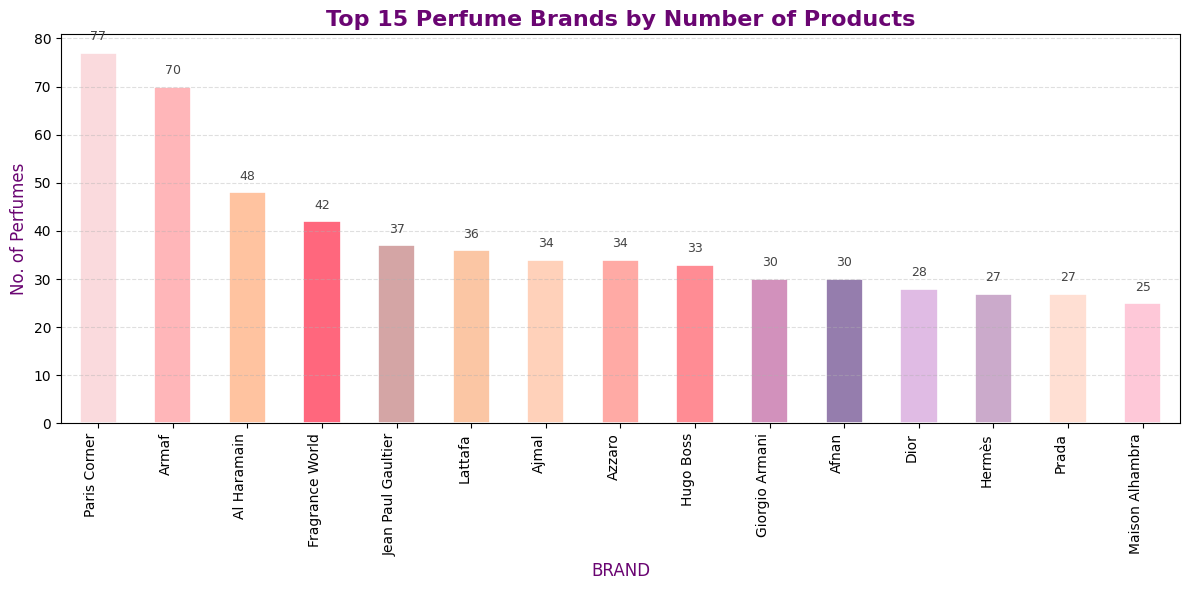

In [13]:
pastel_colors = [
    "#FADADD", "#FFB6B9", "#FFC3A0", "#FF677D", "#D4A5A5",
    "#FBC6A4", "#FFD1BA", "#FFAAA5", "#FF8C94", "#D291BC",
    "#957DAD", "#E0BBE4", "#CBAACB", "#FFDFD3", "#FEC8D8"
]

plt.figure(figsize=(12,6))
bars = top_brands.plot(kind='bar', color=pastel_colors, edgecolor="white", linewidth=1.2)

# Title and labels 
plt.title("Top 15 Perfume Brands by Number of Products", 
          fontsize=16, fontweight='bold', color="#6A0572")
plt.xlabel("BRAND", fontsize=12, color="#6A0572")
plt.ylabel("No. of Perfumes", fontsize=12, color="#6A0572")

plt.xticks(ha="right", fontsize=10)


plt.grid(axis="y", linestyle="--", alpha=0.4)

# Adding values on top of bars
for i, val in enumerate(top_brands.values):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, color="#444444")

plt.tight_layout()
plt.show()

In [14]:
all_brands = df[brand_col].value_counts().head(1004)
print("all brands by number of perfumes:")
print(all_brands)

all brands by number of perfumes:
brand
Paris Corner           77
Armaf                  70
Al Haramain            48
Fragrance World        42
Jean Paul Gaultier     37
Lattafa                36
Ajmal                  34
Azzaro                 34
Hugo Boss              33
Giorgio Armani         30
Afnan                  30
Dior                   28
Hermès                 27
Prada                  27
Maison Alhambra        25
Louis Vuitton          24
Creed                  24
Victoria'S Secret      22
Carolina Herrera       19
Dolce & Gabbana        19
Xerjoff                18
Versace                18
Yves Saint Laurent     17
Parfums De Marly       17
Zimaya                 15
Paco Rabanne           15
Guerlain               14
Mancera                14
Tom Ford               13
Valentino              12
Ralph Lauren           11
Dumont                 10
Jo Malone              10
Diptyque               10
Montblanc               9
Rayhaan                 8
Khadlj                  

* ### **🌸 TYPES AND CATEGORIES**



🌸 PERFUME TYPES & CATEGORIES

type distribution:
type
Edp                  740
Edt                  123
Parfum                39
Extrait De Parfum     17
Cologne               10
Extrait                4
Oil                    3
Concentrate            2
Alcohol-Free           1
Attar                  1
Type                   1
Name: count, dtype: int64


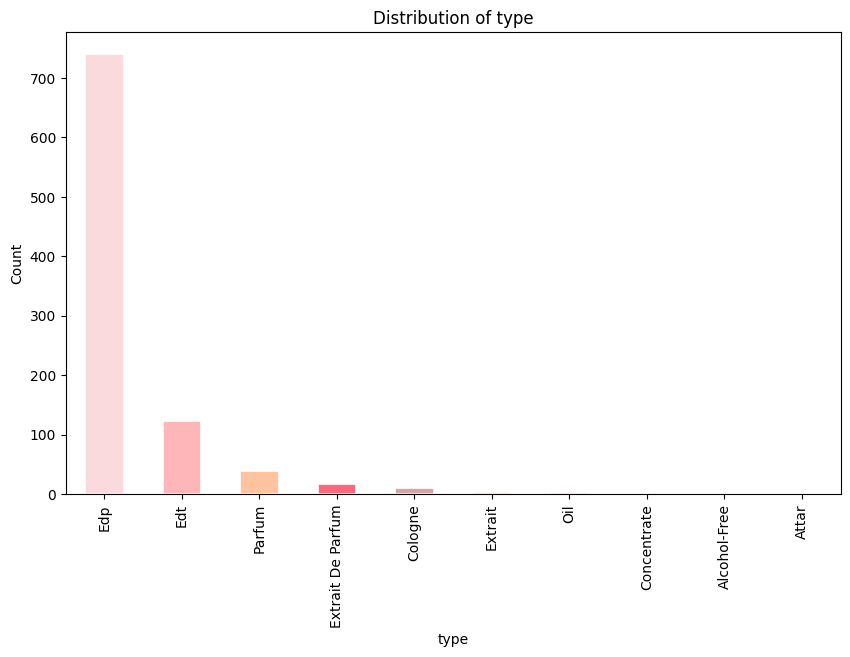


category distribution:
category
Woody Spicy       138
Floriental        119
Woody Aromatic     58
Amber Floral       40
Unknown            38
                 ... 
Gourmand Nutty      1
Floral Sweet        1
Floral Leather      1
Musky Floral        1
Fresh Oriental      1
Name: count, Length: 157, dtype: int64


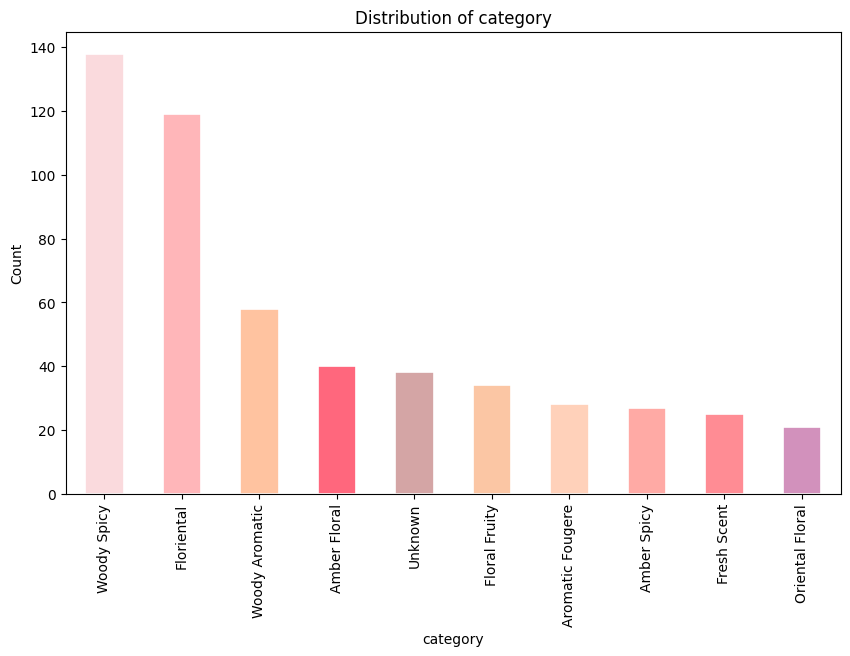

In [15]:
print("\n🌸 PERFUME TYPES & CATEGORIES")

# Look for type/category columns
type_columns = [col for col in df.columns if any(term in col.lower() 
                for term in ['type', 'category'])]

if type_columns:
    for col in type_columns:
        print(f"\n{col} distribution:")
        distribution = df[col].value_counts()
        print(distribution)
        #Customising the bars
        pastel_colors = [
    "#FADADD", "#FFB6B9", "#FFC3A0", "#FF677D", "#D4A5A5",
    "#FBC6A4", "#FFD1BA", "#FFAAA5", "#FF8C94", "#D291BC",
    "#957DAD", "#E0BBE4", "#CBAACB", "#FFDFD3", "#FEC8D8"]
        # plotting the distribution
        plt.figure(figsize=(10, 6))
        distribution.head(10).plot(kind='bar', color=pastel_colors, edgecolor="white", linewidth=1.2)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
       
        
        plt.show()

* #### PERFUME TYPE ANALYSIS 🌸

The analysis reveals a clear concentration of perfume types, with a dominant preference for **Eau de Parfum (EdP)** accounting for the vast majority of entries (over 80%), suggesting it is the most commonly marketed or preferred concentration.

**Eau de Toilette EdT** follows as a distant second, while other types like Parfum, Extrait De Parfum, and Cologne appear in much smaller quantities.

Rare types such as **Oil, Concentrate, Alcohol-Free, and Attar** are minimally represented, indicating niche or speciality products.

* #### PERFUME CATEGORY DISTRIBUTION 🌸

The dataset showcases an incredible variety of 157 unique perfume categories, celebrating both popular and niche scent profiles. 

This distribution reflects a vibrant market enthusiasm for warm, spicy, and floral blends, each embodying depth, sophistication, and the beauty of seasonal appeal.

* ### **TARGET AUDIENCE ANALYSIS👩🏻‍🤝‍👩🏽**
In this section, I am conducting an analysis of a perfume dataset to gain a deeper understanding of the target audience. By analysing customer demographics, preferences, and behaviors, we can uncover helpful actionable insights

In [16]:
print('Target Audience Analysis✨')
print('-'*35)
print('\n Overview')

#Locating target audience columns
audience_columns = [col for col in df.columns if any (term in col.lower() for term in ['target_audience'])]

if audience_columns:
    audience_col = audience_columns[0]
    #distribution by target audience
    audience_dist = df[audience_col].value_counts()
    print("TARGET AUDIENCE DISTRIBUTION")
    print (audience_dist)

Target Audience Analysis✨
-----------------------------------

 Overview
TARGET AUDIENCE DISTRIBUTION
target_audience
Unisex             373
Male               295
Female             271
Gourmand             1
Target Audience      1
Name: count, dtype: int64


* #### OVERVIEW
This shows a balanced representation, but Unisex perfumes slightly dominate the market. That suggests that brands are increasingly creating scents that appeal across gender lines.

This is a reflection of modern, inclusive fragrance trends 🎉

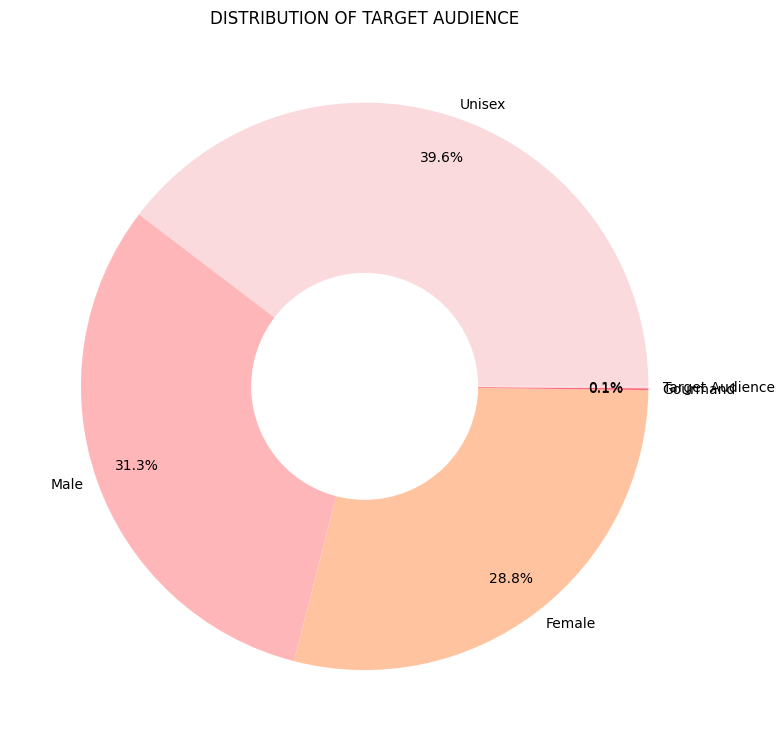

In [17]:
# Pie chart distribution 
plt.figure(figsize=(8,8))

colors = ["#FADADD", "#FFB6B9", "#FFC3A0", "#FF677D"]

audience_dist.plot(kind='pie', autopct='%1.1f%%', colors=colors, pctdistance=0.85, labeldistance=1.05 )

# Turning it into a doughnut
centre_circle = plt.Circle((0, 0), 0.40, fc='white')  # 0.70 controls the hole size
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('DISTRIBUTION OF TARGET AUDIENCE')
plt.ylabel('')
plt.tight_layout()  
plt.show()

* #### VISUAL REPRESENTATION
The doughnut chart highlights that most perfumes (nearly 4 in 10) are positioned as Unisex. 

Male oriented perfumes follow closely, indicating a strong demand for bold,spicy or woody profiles.

Female oriented perfumes form about one-third, typically associated with fruity, floral and vanilla accords 🎀 

In [18]:
# We can perform deeper insights by counting perfumes by target audience and category 
audience_category = df.groupby(["target_audience", "category"]).size().reset_index(name = "count")

# Sorting to see the dominant scent types per audience
audience_category.sort_values(["target_audience", "count"], ascending = [True,False])

,target_audience,category,count
25,Female,Floriental,105
15,Female,Floral Fruity,31
35,Female,Oriental Floral,16
26,Female,Floriental Fruity,15
28,Female,Fruity Floral,13
...,...,...,...
203,Unisex,Woody Creamy,1
204,Unisex,Woody Earthy,1
206,Unisex,Woody Fresh,1
208,Unisex,Woody Leather Chypre,1


From this analysis, it's clear that female-targeted perfumes are dominated by Floriental and Floral Fruity categories, which make up the core of feminine fragrance sets in the dataset.

Masculine perfumes, on the other hand, are strong in Woody Spicy, Woody Aromatic, and Fresh Scent categories, which reflect the classic masculine profile emphasizing freshness, depth, and spice. 

While Unisex fragrances show more variety but fewer counts per category, often leaning toward balanced scent families like Fresh aquatic, Woody aromatic, and Oriental Vanilla, aligning with modern unisex preferences that blur gender lines.

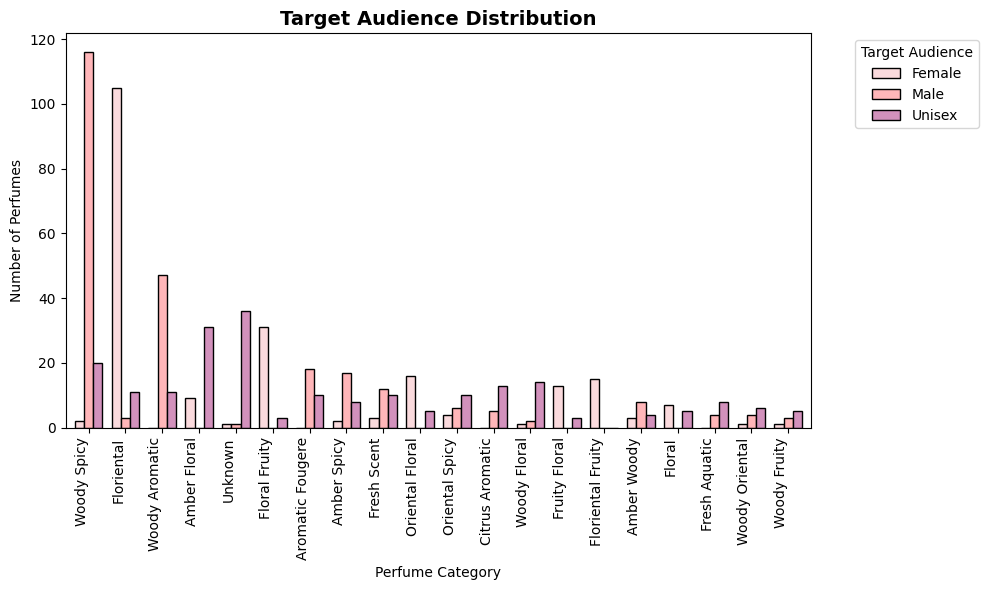

In [19]:

# Keeping only valid target audiences
df = df[df["target_audience"].isin(["Male", "Female", "Unisex"])]

# grouping by audience and category
audience_category = (
    df.groupby(["target_audience", "category"])
    .size()
    .reset_index(name="count")
)

# excluding categories with total count <= 1
category_counts = audience_category.groupby("category")["count"].sum()
valid_categories = category_counts[category_counts > 1].index
audience_category = audience_category[audience_category["category"].isin(valid_categories)]

# obtaining the first 20 categories by total count to increase visibility and neatness
top20_categories = (
    audience_category.groupby("category")["count"]
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .index
)
audience_category = audience_category[audience_category["category"].isin(top20_categories)]

# Pivot for plotting
pivot_data = audience_category.pivot(
    index="category", columns="target_audience", values="count"
).fillna(0)

# Sorting in descending order
pivot_data = pivot_data.loc[pivot_data.sum(axis=1).sort_values(ascending=False).index]

# Grouped bar chart
colors = ["#FADADD", "#FFB6B9", "#D291BC"]
pivot_data.plot(
    kind="bar",
    figsize=(10,6),
    width=0.75,
    edgecolor='black',
    color=colors
)

# Stylising
plt.title("Target Audience Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Perfume Category", fontsize=10)
plt.ylabel("Number of Perfumes", fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.legend(title="Target Audience", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


* #### DEEPER INSIGHTS 🕵🏽‍♀️
Among the top 20 fragrance families, feminine scents lean toward rich florals like Floriental and Floral Fruity, while masculine collections favor deeper Woody Spicy blends. Unisex perfumes, on the other hand, balance freshness and warmth - a reflection of modern, inclusive perfume design

### **LONGEVITY ANALYSIS 🌺**
We've explored the distribution of perfume types and categories and uncovered key insights into target audience preferences. Now, let's turn our attention to longevity: How long do these perfumes last, and what trends emerge in their duration?

In this section, we'll analyse the longevity patterns within the dataset

In [20]:
print("\n LONGEVITY ANALYSIS 🌺")
print("-" * 30)

longevity_columns = [col for col in df.columns if 'longevity' in col.lower()]
if longevity_columns:
    longevity_col = longevity_columns[0]
    
    # Longevity distribution
    longevity_dist = df[longevity_col].value_counts()
    print("Longevity distribution:")
    print(longevity_dist)


 LONGEVITY ANALYSIS 🌺
------------------------------
Longevity distribution:
longevity
Medium                                                 536
Strong                                                 315
Light                                                   41
Very Strong                                             29
6–8 Hours                                               10
Light–Medium                                             2
Medium–Strong :Contentreference[Oaicite:0]{Index=0}      1
Medium :Contentreference[Oaicite:1]{Index=1}             1
Strong :Contentreference[Oaicite:2]{Index=2}             1
Light–Medium :Contentreference[Oaicite:3]{Index=3}       1
Strong :Contentreference[Oaicite:4]{Index=4}             1
Medium :Contentreference[Oaicite:5]{Index=5}             1
Name: count, dtype: int64


This longevity distribution shows that most perfumes in our dataset are created for a moderate wearing experience. It shows that the "Medium" and "Strong" categories are the favourites, indicating that many people prefer scents that last between 4 and 8 hours. This length of time is just right—long enough to enjoy the fragrance without it feeling too intense! 

The relatively small number of "Light" and "Very Strong" entries indicates that extremely short-lived or intensely long-lasting fragrances are less common, possibly catering to niche preferences. Overall, the data reflects a balanced approach to longevity, aligning with the versatility expected in everyday fragrance use.

Check this page by **FRAGRANCE TODAY** for more info on [longevity](https://fragrancetoday.com/what-type-of-perfume-lasts-the-longest/)

Longevity distribution:
longevity
Medium          536
Strong          315
Light            41
Very Strong      29
6–8 Hours        10
Light–Medium      2
Name: count, dtype: int64


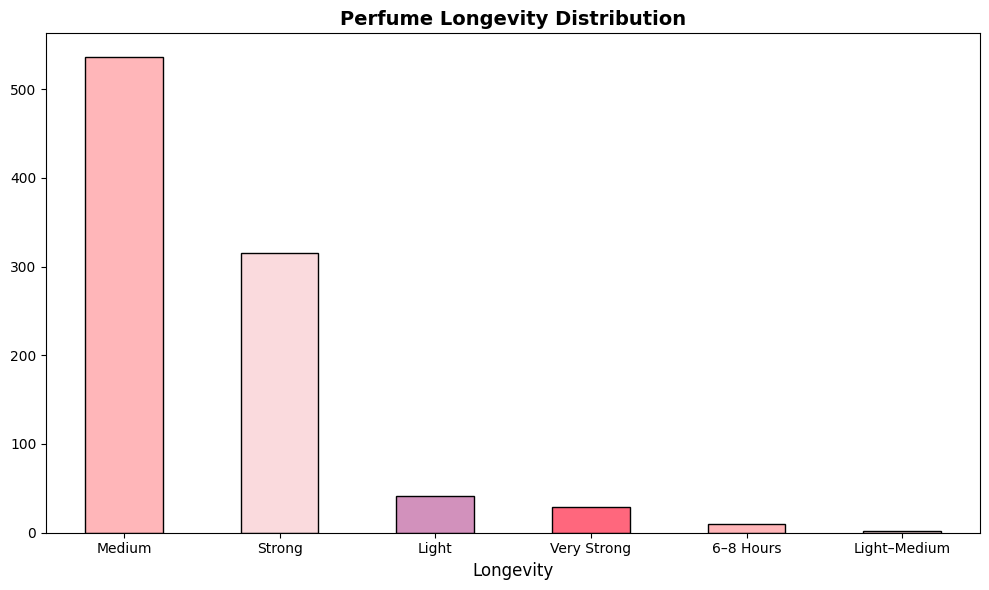

In [21]:
# Cleaning the longevity data — removing invalid entries
df[longevity_col] = df[longevity_col].astype(str).str.strip()
df = df[~df[longevity_col].str.contains("Contentreference", case=False, na=False)]
    
# New longevity distribution
longevity_dist = df[longevity_col].value_counts()
print("Longevity distribution:")
print(longevity_dist)
    
# Plotting longevity
plt.figure(figsize=(10, 6))

# stylising
colors = ["#FFB6B9", "#FADADD", "#D291BC", "#FF677D"]
longevity_dist.plot(kind='bar', color=colors, edgecolor='black')
    
plt.title('Perfume Longevity Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Longevity', fontsize=12)
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

....insert insights...

## **🔗RELATIONSHIP ANALYSIS**